In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
lays_logo = cv2.imread("/home/dhvani/Subhiksha/Opencv/Pattern Recogonition/LaysLogo.png",cv2.IMREAD_GRAYSCALE) #template
lays_packet = cv2.imread("/home/dhvani/Subhiksha/Opencv/Pattern Recogonition/layspacket.jpg", cv2.IMREAD_GRAYSCALE)
# lays_bgr = cv2.imread("/home/dhvani/Subhiksha/Opencv/Pattern Recogonition/LaysLogo.png",cv2.IMREAD_COLOR)


In [49]:
lays_logo = cv2.rotate(lays_logo, cv2.ROTATE_90_CLOCKWISE)


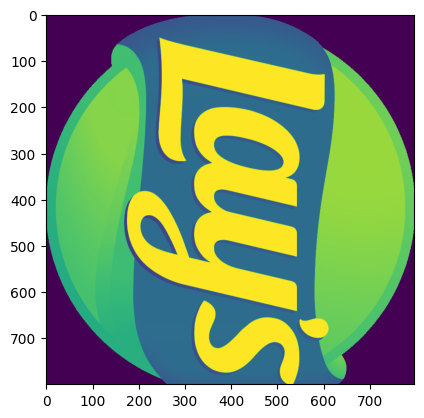

In [44]:
plt.imshow(lays_logo)

In [45]:
cv2.imshow("original",lays_logo)
# cv2.imshow("template", lays_packet)
# cv2.imshow("clr", lays_bgr)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [60]:
orb_detector =cv2.ORB_create()
kp1, desc1= orb_detector.detectAndCompute(lays_packet, None)
kp2, desc2 =orb_detector.detectAndCompute(lays_logo, None) 

In [61]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) # type: ignore
matches = bf.match(desc1, desc2)
matches = sorted(matches, key = lambda x:x.distance)

matching_result = cv2.drawMatches(lays_packet, kp1, lays_logo, kp2, matches[:44],None)
print(len(matches))
cv2.imshow("matched results ",matching_result)
cv2.imwrite("feature_lays.jpg", matching_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

67


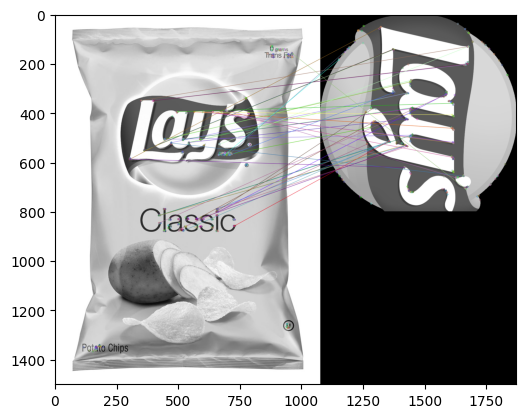

In [57]:
plt.imshow(matching_result)

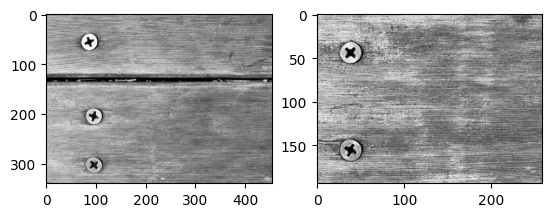

In [94]:
screw1 = cv2.imread("/home/dhvani/Subhiksha/Opencv/Screws/screw1.png", cv2.IMREAD_GRAYSCALE)
# plt.imshow(screw1[30:90,70:110], cmap ="gray")
template = cv2.imread("/home/dhvani/Subhiksha/Opencv/Screws/screw2.png", cv2.IMREAD_GRAYSCALE)

plt.subplot(1,2,1)
plt.imshow(screw1, cmap ="gray")
plt.subplot(1,2,2)
plt.imshow(template, cmap ="gray")



In [10]:
orb_detector =cv2.ORB_create()
kp1, desc1= orb_detector.detectAndCompute(screw1, None)
kp2, desc2 =orb_detector.detectAndCompute(template, None) 

len(desc1)

346

In [11]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) # type: ignore
if len(desc1) != None and len(desc2) != None:
    matches = bf.match(desc1, desc2)
    matches = sorted(matches, key = lambda x:x.distance)

    matching_result = cv2.drawMatches(screw1, kp1, template, kp2, matches[:44],None)
    print(len(matches))
    cv2.imshow("matched results ",matching_result)
    cv2.imwrite("feature_lays.jpg", matching_result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

109


In [105]:
def bruteForceorb(gimg, temp):
    orb_detector =cv2.ORB_create()
    kp1, desc1= orb_detector.detectAndCompute(gimg, None)
    kp2, desc2 =orb_detector.detectAndCompute(temp, None) 
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) # type: ignore
    if len(desc1) != None and len(desc2) != None:
        matches = bf.match(desc1, desc2)
        matches = sorted(matches, key = lambda x:x.distance)

        matching_result = cv2.drawMatches(gimg, kp1, temp, kp2, matches[:44],None)
        print(len(matches))
        # cv2.imshow("matched results ",matching_result)
        plt.imshow(matching_result)
        cv2.imwrite("feature_lays.jpg", matching_result)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

103


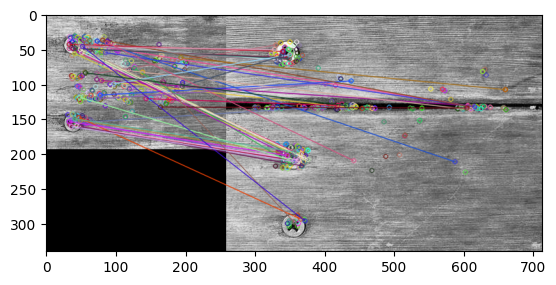

In [106]:
bruteForceorb( template, screw1)

SIFT
Scale Invariant Feature Transform (SIFT) 


In [ ]:
lays_packet_clr = cv2.imread("/home/dhvani/Subhiksha/Opencv/Pattern Recogonition/layspacket.jpg", cv2.IMREAD_COLOR)

In [25]:
sift = cv2.SIFT_create()
kp = sift.detect(lays_packet,None)
result = cv2.drawKeypoints(lays_packet,kp,lays_packet, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow("result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [121]:
def knnBruteForce(gimg, temp):
    sift = cv2.SIFT_create()
    kp1, desc1 = sift.detectAndCompute(gimg,None)
    # print(kp1, desc1)
    kp2, desc2 = sift.detectAndCompute(temp,None)

    bf = cv2.BFMatcher() # type: ignore
    nneigbour =2 
    matches=   bf.knnMatch(desc1,desc2,k=nneigbour) 
    good_matches=[]
    test_ratio = 0.75
    for m,n in matches:
        if m.distance < test_ratio*n.distance:
            good_matches.append([m])
    result = cv2.drawMatchesKnn(gimg, kp1, temp, kp2,good_matches,None,flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)



    # cv2.imshow("result", result)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    plt.imshow(result)
    cv2.imwrite("knnsift.png",result)

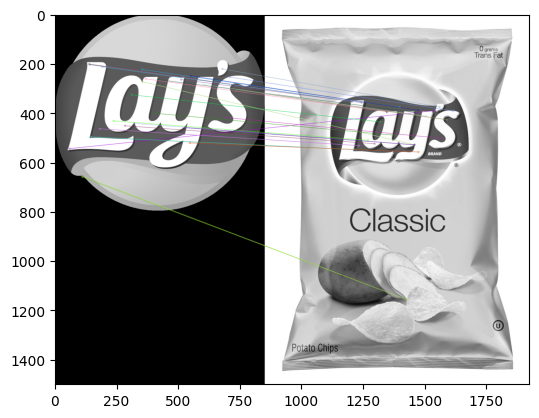

In [122]:
knnBruteForce(lays_logo, lays_packet)

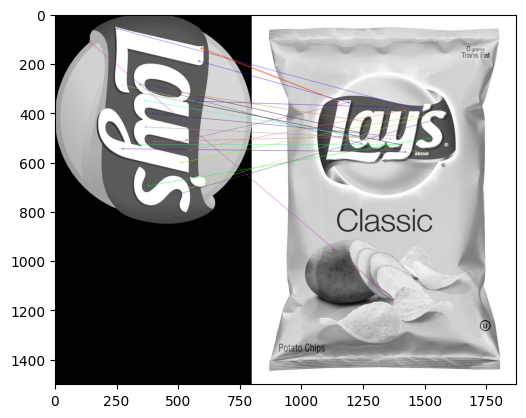

In [74]:
knnBruteForce(lays_logo, lays_packet)

In [ ]:
lays_packet2 = cv2.imread("/home/dhvani/Subhiksha/Opencv/Pattern Recogonition/Imgfilledlogos.png", cv2.IMREAD_GRAYSCALE)

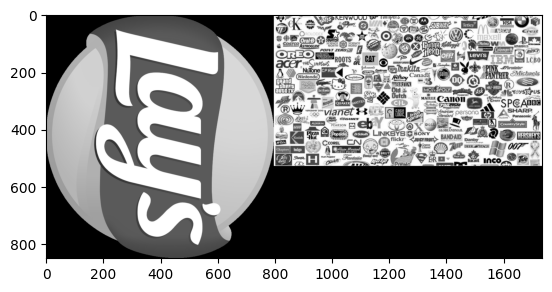

In [79]:
knnBruteForce( lays_logo, lays_packet2)

In [109]:
alllogo = cv2.imread("/home/dhvani/Subhiksha/Opencv/Pattern Recogonition/All_Logo.png",cv2.IMREAD_GRAYSCALE)
kfclogo = img[830:1110,420:600]


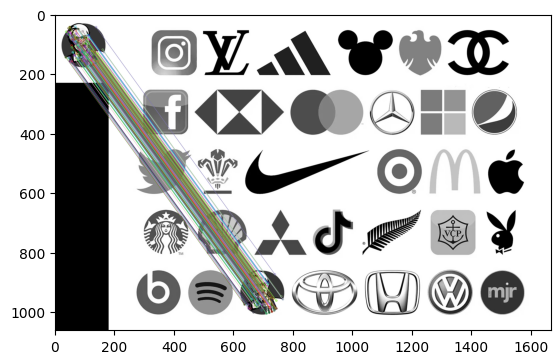

In [110]:
knnBruteForce(  kfclogo, alllogo)

In [113]:
kfcbucket = cv2.imread("/home/dhvani/Subhiksha/Opencv/Pattern Recogonition/kfcbucket.png",cv2.IMREAD_GRAYSCALE)

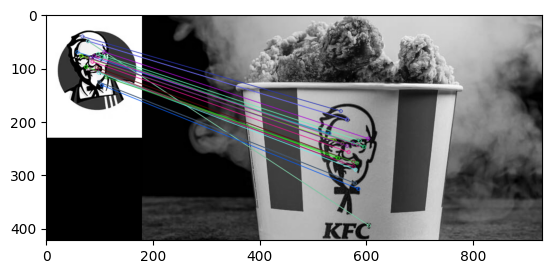

In [114]:
knnBruteForce(kfclogo,kfcbucket)

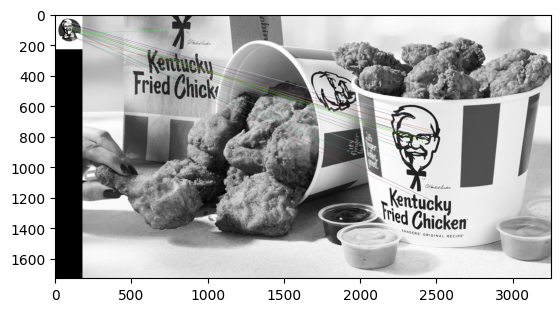

In [116]:
kfcbucket2 = cv2.imread("/home/dhvani/Subhiksha/Opencv/Pattern Recogonition/kfcbucket2.png",cv2.IMREAD_GRAYSCALE)
knnBruteForce(kfclogo,kfcbucket2)

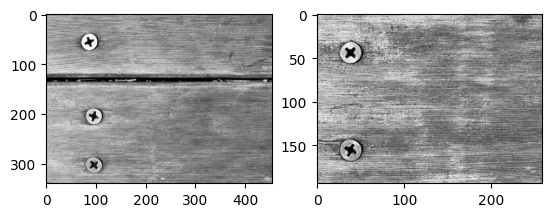

In [97]:
screw1 = cv2.imread("/home/dhvani/Subhiksha/Opencv/Screws/screw1.png", cv2.IMREAD_GRAYSCALE)
# plt.imshow(screw1[30:90,70:110], cmap ="gray")
screw2 = cv2.imread("/home/dhvani/Subhiksha/Opencv/Screws/screw2.png", cv2.IMREAD_GRAYSCALE)

plt.subplot(1,2,1)
plt.imshow(screw1, cmap ="gray")
plt.subplot(1,2,2)
plt.imshow(screw2, cmap ="gray")



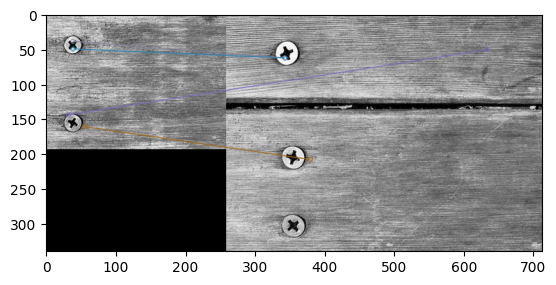

In [ ]:
knnBruteForce(screw2, screw1)

In [ ]:
# import cv2
# import numpy as np

# def detect_object(template, scene):
#     # Step 1: SIFT keypoints and descriptors
#     sift = cv2.SIFT_create()
#     kp1, desc1 = sift.detectAndCompute(template, None)
#     kp2, desc2 = sift.detectAndCompute(scene, None)

#     # Step 2: Match descriptors with ratio test
#     bf = cv2.BFMatcher(cv2.NORM_L2)
#     matches = bf.knnMatch(desc1, desc2, k=2)

#     good = []
#     ratio = 0.75
#     for m, n in matches:
#         if m.distance < ratio * n.distance:
#             good.append(m)

#     # Step 3: Homography (requires enough matches)
#     MIN_MATCH_COUNT = 8
#     if len(good) >= MIN_MATCH_COUNT:
#         src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
#         dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

#         H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

#         if H is not None:
#             h, w = template.shape[:2]
#             corners = np.float32([[0,0], [0,h-1], [w-1,h-1], [w-1,0]]).reshape(-1,1,2)
#             projected_corners = cv2.perspectiveTransform(corners, H)

#             result = cv2.polylines(scene.copy(), [np.int32(projected_corners)], True, (0,255,0), 3)
#             cv2.imshow("Detected Object", result)
#             cv2.waitKey(0)
#             cv2.destroyAllWindows()

#             plt.imshow(result, cmap="gray")

#         else:
#             print("Homography failed — object not reliably detected.")
#     else:
#         print("Not enough good matches.")




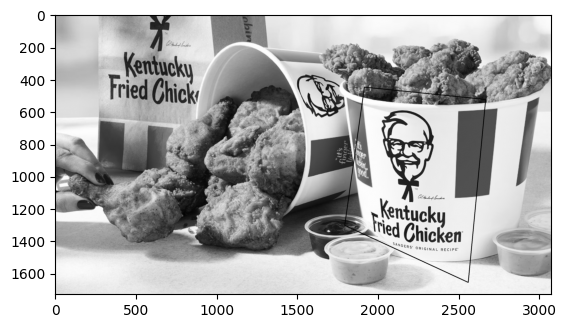

In [ ]:
# detect_object(kfclogo, kfcbucket2)
